### Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

### Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.


### Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.



https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
stock = pd.read_csv('data_stocks.csv')

In [4]:
stock.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
stock.shape

(41266, 502)

In [6]:

stock.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DATE,41266.0,1.497749e+09,3.822211e+06,1.491226e+09,1.494432e+09,1.497638e+09,1.501090e+09,1.504210e+09
SP500,41266.0,2.421538e+03,3.955713e+01,2.329140e+03,2.390860e+03,2.430150e+03,2.448820e+03,2.490650e+03
NASDAQ.AAL,41266.0,4.770835e+01,3.259377e+00,4.083000e+01,4.494540e+01,4.836000e+01,5.018000e+01,5.447500e+01
NASDAQ.AAPL,41266.0,1.504536e+02,6.236826e+00,1.401600e+02,1.446400e+02,1.499450e+02,1.550650e+02,1.645100e+02
NASDAQ.ADBE,41266.0,1.413179e+02,6.916740e+00,1.282400e+02,1.351950e+02,1.422600e+02,1.471000e+02,1.553300e+02
NASDAQ.ADI,41266.0,7.944687e+01,2.000283e+00,7.480000e+01,7.803000e+01,7.941000e+01,8.058000e+01,9.044000e+01
NASDAQ.ADP,41266.0,1.034804e+02,4.424244e+00,9.587000e+01,1.013000e+02,1.024400e+02,1.046600e+02,1.217700e+02
NASDAQ.ADSK,41266.0,1.029986e+02,9.389788e+00,8.300000e+01,9.482000e+01,1.068200e+02,1.104900e+02,1.192700e+02
NASDAQ.AKAM,41266.0,5.089435e+01,4.833931e+00,4.465000e+01,4.744000e+01,4.950990e+01,5.223000e+01,6.256000e+01
NASDAQ.ALXN,41266.0,1.229812e+02,1.125201e+01,9.625000e+01,1.169500e+02,1.236200e+02,1.322188e+02,1.428750e+02


In [7]:

# identify if any missing values
df_na = (stock.isnull().sum() / len(stock)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


In [8]:

#Droping Date and SP500
#way 1 for drop
stock.drop(['DATE','SP500'], axis=1, inplace=True)


In [9]:
stock.info()   # all columns are of float type means fully numeric data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 500 entries, NASDAQ.AAL to NYSE.ZTS
dtypes: float64(500)
memory usage: 157.4 MB


### Excersise 1:

Which are stocks are apparently similar in nature

In [11]:
# Finding correlation between variables - identify highly correlated variables
cor = stock.corr()

In [12]:
cor_dt = pd.DataFrame(data=cor.values, columns=cor.index, index = cor.index)
cor_dt.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213


In [14]:
cor_dt[cor_dt['NASDAQ.AAL'].values > 0.80][:5]

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AMZN,0.803319,0.370111,0.730719,0.386619,0.252712,0.828757,-0.648854,0.059345,0.897693,0.170978,...,0.879967,-0.733852,0.530139,0.804398,-0.203979,0.533584,0.503878,0.793529,0.419472,0.872246
NASDAQ.EXPE,0.812206,0.379622,0.818384,0.218189,0.369697,0.834440,-0.707045,0.296553,0.817588,0.199334,...,0.931258,-0.825230,0.591514,0.859042,-0.368192,0.712184,0.658203,0.883902,0.347660,0.913009
NASDAQ.HAS,0.832713,-0.274890,0.251696,0.252954,-0.030201,0.394658,-0.206013,-0.208923,0.530874,0.258187,...,0.698866,-0.609800,0.035341,0.625126,0.264187,0.306630,0.055201,0.406760,0.839854,0.651842
NYSE.CMI,0.810391,0.088336,0.528227,0.206259,0.179664,0.577301,-0.458993,0.140823,0.690999,0.184153,...,0.803020,-0.677137,0.226787,0.767652,-0.003402,0.521924,0.370814,0.616157,0.581472,0.753369
NYSE.COH,0.837497,0.161166,0.476242,0.257488,0.111937,0.632158,-0.575362,-0.061769,0.698357,0.040742,...,0.785964,-0.622571,0.270847,0.718301,0.088650,0.407912,0.305606,0.624507,0.488613,0.785750
NYSE.CSRA,0.803510,0.334035,0.832643,0.154026,0.497718,0.768976,-0.616766,0.386223,0.696207,0.346399,...,0.837405,-0.927944,0.649768,0.877170,-0.446198,0.843635,0.770891,0.878215,0.308781,0.810754
NYSE.DAL,0.908578,-0.016610,0.452003,0.194325,0.012064,0.537964,-0.444039,-0.056278,0.628435,0.170080,...,0.776583,-0.736920,0.200001,0.750989,0.051927,0.469302,0.278065,0.610742,0.662851,0.787479
NYSE.DE,0.850040,0.305125,0.677498,0.282661,0.463447,0.787228,-0.649532,0.083421,0.710929,0.205290,...,0.834250,-0.820615,0.571294,0.805954,-0.210496,0.630953,0.587302,0.802758,0.304364,0.809627
NYSE.FBHS,0.816213,-0.126611,0.429645,0.011530,0.310310,0.402018,-0.212418,0.279779,0.465293,0.404898,...,0.772558,-0.655985,0.099429,0.801572,0.020292,0.587787,0.347267,0.497662,0.644646,0.589896



### Excersise 2:

How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [29]:
x= stock.transpose()

In [30]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [31]:
df=pd.DataFrame(data=scaled_data, columns= x.columns)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
0,-0.437323,-0.436746,-0.437331,-0.436787,-0.435683,-0.435832,-0.436309,-0.436076,-0.436684,-0.436878,...,-0.416696,-0.416629,-0.416519,-0.416538,-0.416767,-0.416694,-0.416613,-0.416470,-0.416401,-0.416296
1,0.402984,0.402215,0.401978,0.402752,0.403075,0.404042,0.404447,0.403758,0.403828,0.404084,...,0.498092,0.497690,0.498333,0.498296,0.498026,0.497946,0.497755,0.497124,0.496748,0.496721
2,0.286494,0.291446,0.290503,0.290279,0.288776,0.290306,0.290979,0.290471,0.290171,0.291453,...,0.428395,0.428348,0.428855,0.428525,0.428323,0.428844,0.429134,0.428607,0.428398,0.429186
3,-0.108082,-0.107917,-0.108496,-0.108250,-0.108074,-0.108145,-0.107533,-0.106905,-0.106529,-0.106734,...,-0.118073,-0.118037,-0.118769,-0.118308,-0.118423,-0.118300,-0.118538,-0.118654,-0.118557,-0.118057
4,0.059316,0.058153,0.058592,0.058713,0.058024,0.057773,0.060048,0.060333,0.060455,0.060389,...,0.057394,0.057119,0.057338,0.057154,0.057519,0.057097,0.057152,0.056757,0.056303,0.056369


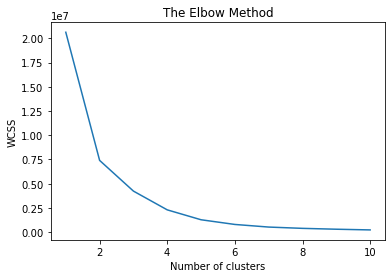

In [32]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[1 0 0 1 1 1 1 1 1 1 0 2 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 2 2 1 1 1 1 1 0 0 0 1 1 1 1 2 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 

In [42]:
# Looking at the points which belong to Cluster0
df[y_kmeans==2]

,0,1,2,3,4,5,6,7,8,9,...,41256,41257,41258,41259,41260,41261,41262,41263,41264,41265
11,6.578808,6.556724,6.559946,6.559235,6.565219,6.568038,6.569076,6.576052,6.585827,6.578860,...,6.747973,6.749734,6.751700,6.750415,6.747394,6.747208,6.746384,6.746058,6.746070,6.749553
51,6.088470,6.109533,6.132820,6.122761,6.140044,6.139473,6.137811,6.138485,6.142637,6.146734,...,6.431887,6.433059,6.431965,6.431965,6.431280,6.432803,6.429774,6.426794,6.426043,6.433550
52,6.241192,6.267407,6.284832,6.281600,6.301206,6.295684,6.294944,6.296151,6.299759,6.303146,...,6.552056,6.551592,6.552536,6.552207,6.552226,6.553118,6.550781,6.547437,6.546997,6.555372
65,5.566625,5.558504,5.562504,5.567036,5.569924,5.570753,5.568236,5.570515,5.576301,5.567211,...,6.931176,6.936689,6.936807,6.936790,6.932911,6.935361,6.935246,6.931656,6.928938,6.933856
91,13.938938,13.944144,13.928430,13.938759,13.926582,13.936427,13.942915,13.938571,13.930041,13.927880,...,13.423310,13.419056,13.418025,13.421006,13.425321,13.421231,13.425736,13.429153,13.433998,13.422446


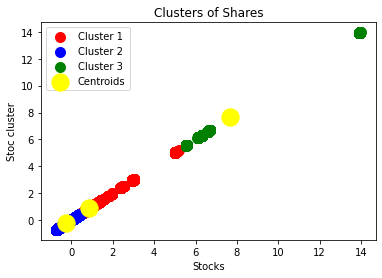

In [46]:
# Visualising the clusters
plt.scatter(df[y_kmeans == 0][df.index], df[y_kmeans == 0][df.index], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1][df.index], df[y_kmeans == 1][df.index], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2][df.index], df[y_kmeans == 2][df.index], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Shares')
plt.xlabel('Stocks')
plt.ylabel('Stoc cluster')
plt.legend()
plt.show()

In [50]:
x['Cluster_Name'] = y_kmeans

In [54]:
x['stock_name']= x.index

In [57]:

df_stock = pd.DataFrame(x, columns=['stock_name','Cluster_Name'])
df_stock.Cluster_Name.value_counts()

1    417
0     78
2      5
Name: Cluster_Name, dtype: int64

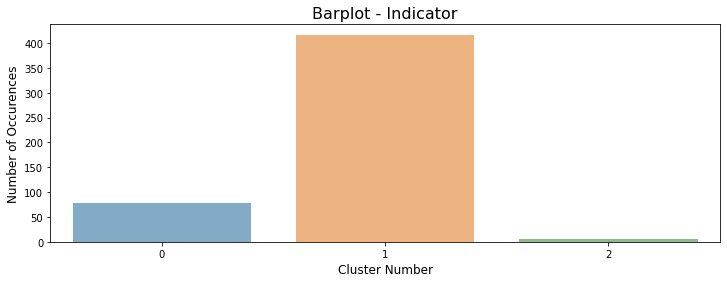

In [59]:

import seaborn as sns
ind = df_stock.Cluster_Name.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=ind.index, y=ind.values, alpha=0.6)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Cluster Number',fontsize=12)
plt.title('Barplot - Indicator',fontsize =16)
plt.show()

### Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [60]:

# Apply PCA to identify the stocks correlated with each other
stock.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [62]:
dt = stock.copy()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# convert data into numpy arrays
X = dt.values

# Scaling the values
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=150)
pca.fit(X_scaled)

# the amount of variance that each PCA explains
var = pca.explained_variance_ratio_

# cumulative varince explains
var1 = np.cumsum(np.round(var, decimals=4)*100)
print(var1)

[47.03 64.26 76.28 81.13 84.93 87.74 89.74 91.05 92.1  92.85 93.53 94.11
 94.57 95.02 95.43 95.78 96.11 96.37 96.6  96.82 97.01 97.17 97.32 97.45
 97.58 97.7  97.81 97.91 98.   98.08 98.16 98.24 98.31 98.38 98.44 98.5
 98.56 98.61 98.66 98.71 98.75 98.79 98.83 98.87 98.91 98.94 98.97 99.
 99.03 99.06 99.09 99.12 99.15 99.17 99.19 99.21 99.23 99.25 99.27 99.29
 99.31 99.33 99.35 99.37 99.39 99.41 99.43 99.45 99.46 99.47 99.48 99.49
 99.5  99.51 99.52 99.53 99.54 99.55 99.56 99.57 99.58 99.59 99.6  99.61
 99.62 99.63 99.64 99.65 99.66 99.67 99.68 99.69 99.7  99.71 99.72 99.73
 99.74 99.75 99.76 99.77 99.78 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79 99.79
 99.79 99.79 99.79 99.79 99.79 99.79]


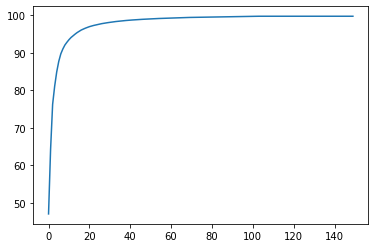

In [63]:

plt.plot(var1)

In [64]:

# Looking at above plot I can consider 25 variables 
pca = PCA(n_components =25)
X1 = pca.fit_transform(X_scaled)
print(X1)

[[ 25.55018064  10.00580482  -9.38207446 ...   0.55096205   0.09588743
    2.4170329 ]
 [ 25.64880185   9.89282687  -9.8023104  ...   0.45282776   0.17953629
    2.31035442]
 [ 25.56345929   9.82533675  -9.67570287 ...   0.529581     0.05199495
    2.05277665]
 ...
 [-22.76894921  13.32753802   6.56220278 ...  -2.1512629    1.19034712
   -0.31360878]
 [-22.61319638  13.41831515   6.6755356  ...  -2.13694777   1.19653111
   -0.34021684]
 [-22.72127837  13.36292841   6.60406294 ...  -2.17426129   1.176209
   -0.29970242]]


In [65]:

print('Number of PCA :',len(pca.components_))
print(abs(pca.components_))

Number of PCA : 25
[[0.03925756 0.04106421 0.0629084  ... 0.06247664 0.00253829 0.05169773]
 [0.06428354 0.033861   0.00186129 ... 0.02040637 0.08122924 0.05950068]
 [0.03985758 0.06416494 0.01207933 ... 0.02101011 0.06637293 0.02356977]
 ...
 [0.0116348  0.00533699 0.0047705  ... 0.01178601 0.04437825 0.01197921]
 [0.07424034 0.0215538  0.00909758 ... 0.00123818 0.01829926 0.04834682]
 [0.02120489 0.03322084 0.0370885  ... 0.00439174 0.02065939 0.02526325]]


In [66]:
comp = pd.DataFrame(pca.components_, columns = dt.columns)
comp.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.039258,-0.041064,-0.062908,-0.009788,-0.035866,-0.054668,0.050356,-0.035396,-0.044060,-0.014671,...,-0.049413,0.057001,-0.054623,-0.050608,0.047199,-0.057897,-0.061392,-0.062477,0.002538,-0.051698
1,-0.064284,0.033861,0.001861,-0.032453,0.043511,-0.029519,0.016178,0.058286,-0.052667,0.012376,...,-0.058941,0.030277,0.013643,-0.040769,-0.052795,0.010238,0.031466,-0.020406,-0.081229,-0.059501
2,-0.039858,0.064165,0.012079,0.043266,-0.037239,0.040506,-0.053892,-0.051099,0.030738,-0.086428,...,-0.003223,0.022125,0.059617,-0.034587,-0.028712,-0.039074,-0.004342,0.021010,-0.066373,0.023570
3,0.007578,0.077164,0.008564,-0.027896,-0.017418,0.008973,-0.032239,0.034448,0.051511,-0.077594,...,0.021692,0.060885,-0.039630,0.027694,0.012100,-0.039575,0.002900,-0.002703,-0.049420,0.015160
4,-0.033303,-0.016981,0.002438,-0.038330,-0.102023,-0.034831,-0.011187,0.037595,-0.039683,-0.014357,...,-0.036672,-0.011451,-0.030314,-0.012030,-0.045731,0.029255,-0.003013,-0.001339,-0.003603,0.005364
